## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
#import sys
#sys.executable

In [2]:
#conda activate mi_entorno

In [3]:
#pip install tensorflow
#pip install matplotlib
#pip install scikit-learn
#pip install Pillow
#conda install tensorflow-gpu

In [4]:
import os as os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image

2023-09-10 10:58:36.096191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def is_image_file(filename):
    try:
        # Intenta abrir el archivo de imagen con Pillow
        img = Image.open(filename)
        img.verify()  # Intenta verificar la integridad del archivo de imagen
        return True
    except Exception as e:
        return False

def count_images_in_directory(directory):
    total_count = 0  # Contador total de imágenes
    image_counts = {}  # Un diccionario para mantener el recuento de imágenes por carpeta
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if is_image_file(file_path):
                # Obtener el nombre de la carpeta que contiene la imagen
                folder_name = os.path.basename(os.path.dirname(file_path))
                # Incrementar el recuento de imágenes para la carpeta correspondiente
                image_counts[folder_name] = image_counts.get(folder_name, 0) + 1
                total_count += 1  # Incrementar el contador total de imágenes
    return total_count, image_counts

data_dir = "Downloads/chest_xray/chest_xray/"  # Reemplaza con la ruta real a tu directorio
total_count, image_counts = count_images_in_directory(data_dir)

if total_count > 0:
    print(f"Total de imágenes: {total_count}")
    print("Cantidad de imágenes por carpeta:")
    for folder, count in image_counts.items():
        print(f"{folder}: {count} imágenes")
else:
    print("No se encontraron imágenes en el directorio.")


Total de imágenes: 5856
Cantidad de imágenes por carpeta:
PNEUMONIA: 4273 imágenes
NORMAL: 1583 imágenes


In [6]:
def is_image_file(filename):
    try:
        # Intenta abrir el archivo de imagen con Pillow
        img = Image.open(filename)
        img.verify()  # Intenta verificar la integridad del archivo de imagen
        return True
    except Exception as e:
        return False

def count_images_in_directory(directory):
    total_count = 0  # Contador total de imágenes
    image_counts = {}  # Un diccionario para mantener el recuento de imágenes por carpeta
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if is_image_file(file_path):
                # Obtener el nombre de la carpeta que contiene la imagen
                folder_name = os.path.basename(os.path.dirname(file_path))
                # Incrementar el recuento de imágenes para la carpeta correspondiente
                image_counts[folder_name] = image_counts.get(folder_name, 0) + 1
                total_count += 1  # Incrementar el contador total de imágenes
    return total_count, image_counts

data_dir = "Downloads/chest_xray/chest_xray/" 

# Directorios de entrenamiento, validación y prueba
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

# Contar imágenes en cada conjunto
total_count_train, image_counts_train = count_images_in_directory(train_dir)
total_count_val, image_counts_val = count_images_in_directory(val_dir)
total_count_test, image_counts_test = count_images_in_directory(test_dir)

if total_count_train > 0 and total_count_val > 0 and total_count_test > 0:
    print(f"Total de imágenes en conjunto de entrenamiento: {total_count_train}")
    print(f"Total de imágenes en conjunto de validación: {total_count_val}")
    print(f"Total de imágenes en conjunto de prueba: {total_count_test}")
    
    print("\nCantidad de imágenes por carpeta en conjunto de entrenamiento:")
    for folder, count in image_counts_train.items():
        print(f"{folder}: {count} imágenes")
    
    print("\nCantidad de imágenes por carpeta en conjunto de validación:")
    for folder, count in image_counts_val.items():
        print(f"{folder}: {count} imágenes")
    
    print("\nCantidad de imágenes por carpeta en conjunto de prueba:")
    for folder, count in image_counts_test.items():
        print(f"{folder}: {count} imágenes")
else:
    print("No se encontraron imágenes en los directorios de entrenamiento, validación y prueba.")


Total de imágenes en conjunto de entrenamiento: 5216
Total de imágenes en conjunto de validación: 16
Total de imágenes en conjunto de prueba: 624

Cantidad de imágenes por carpeta en conjunto de entrenamiento:
PNEUMONIA: 3875 imágenes
NORMAL: 1341 imágenes

Cantidad de imágenes por carpeta en conjunto de validación:
PNEUMONIA: 8 imágenes
NORMAL: 8 imágenes

Cantidad de imágenes por carpeta en conjunto de prueba:
PNEUMONIA: 390 imágenes
NORMAL: 234 imágenes


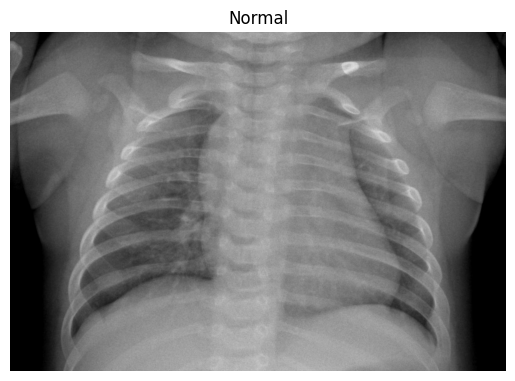

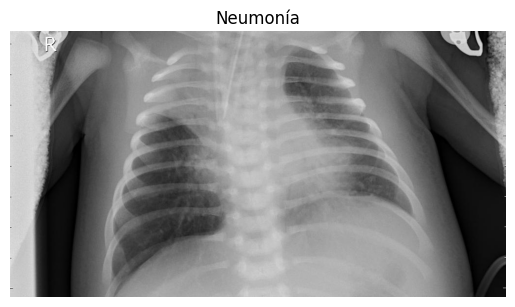

In [7]:
# Rutas de las carpetas de ejemplo
ejemplo_normal_dir = ("Downloads/chest_xray/chest_xray/test/NORMAL")
ejemplo_pneumonia_dir = ("Downloads/chest_xray/chest_xray/test/PNEUMONIA")

# Función para mostrar una imagen de ejemplo
def mostrar_imagen_ejemplo(carpeta, etiqueta):
    imagen = os.listdir(carpeta)[2]
    imagen_ruta = os.path.join(carpeta, imagen)

    plt.imshow(load_img(imagen_ruta))
    plt.title(etiqueta)
    plt.axis('off')
    plt.show()

mostrar_imagen_ejemplo(ejemplo_normal_dir, etiqueta="Normal")
mostrar_imagen_ejemplo(ejemplo_pneumonia_dir, etiqueta="Neumonía")

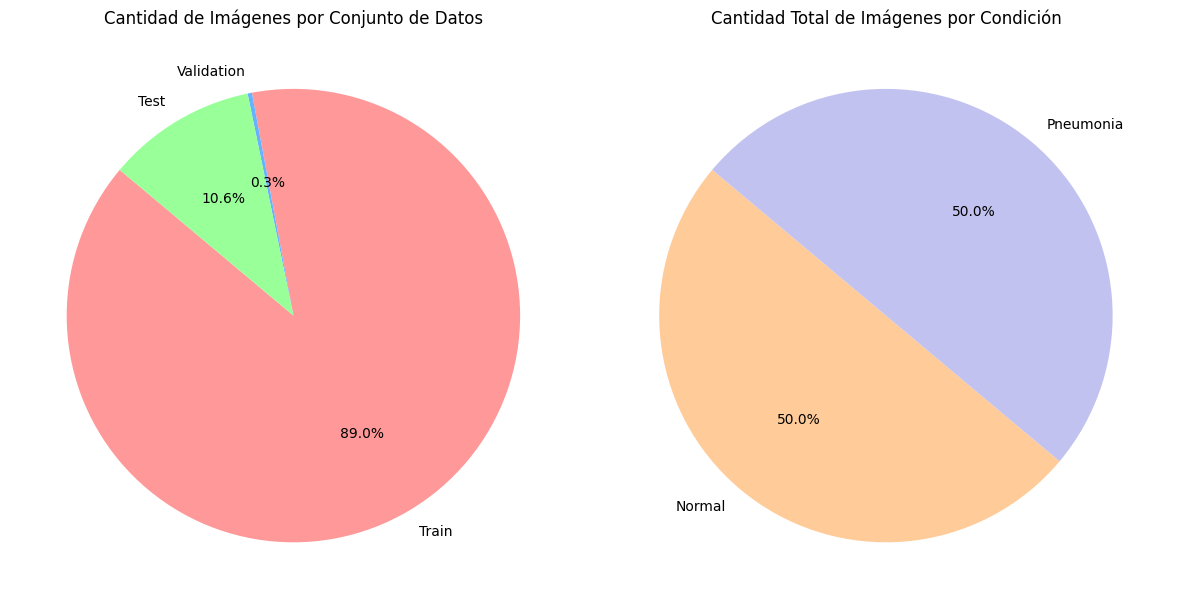

In [8]:
# Directorio que contiene las imágenes de train, val y test
dataset_dir = "Downloads/chest_xray/chest_xray/"

# Contar la cantidad de imágenes en cada conjunto de datos
train_count = len(os.listdir(os.path.join(dataset_dir, 'train', 'NORMAL'))) + len(os.listdir(os.path.join(dataset_dir, 'train', 'PNEUMONIA')))
val_count = len(os.listdir(os.path.join(dataset_dir, 'val', 'NORMAL'))) + len(os.listdir(os.path.join(dataset_dir, 'val', 'PNEUMONIA')))
test_count = len(os.listdir(os.path.join(dataset_dir, 'test', 'NORMAL'))) + len(os.listdir(os.path.join(dataset_dir, 'test', 'PNEUMONIA')))

# Contar la cantidad de imágenes "neumonía" y "normal" en total
normal_count = train_count + val_count + test_count
pneumonia_count = normal_count  # Dado que no hay otras clases en el ejemplo proporcionado

# Etiquetas para las gráficas
data_labels = ['Train', 'Validation', 'Test']
condition_labels = ['Normal', 'Pneumonia']

# Datos para las gráficas
data_counts = [train_count, val_count, test_count]
condition_counts = [normal_count, pneumonia_count]

# Colores personalizados
data_colors = ['#FF9999', '#66B2FF', '#99FF99']  # Colores para los conjuntos de datos
condition_colors = ['#FFCC99', '#c2c2f0']         # Colores para las condiciones

# Gráfica para los conjuntos de datos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(data_counts, labels=data_labels, autopct='%1.1f%%', startangle=140, colors=data_colors)
plt.title('Cantidad de Imágenes por Conjunto de Datos')

# Gráfica para las condiciones (normal y neumonía)
plt.subplot(1, 2, 2)
plt.pie(condition_counts, labels=condition_labels, autopct='%1.1f%%', startangle=140, colors=condition_colors)
plt.title('Cantidad Total de Imágenes por Condición')

plt.tight_layout()
plt.show()


In [9]:
import shutil

# Directorio de las imágenes originales
original_images_dir = "Downloads/chest_xray/chest_xray/"
# Directorio de destino para las imágenes redimensionadas
resized_images_dir = "Downloads/chest_xray/chest_xray_Redimensionado/"

# Tamaño deseado para las imágenes redimensionadas
target_width, target_height = 540, 360

# Asegúrate de que el directorio de destino exista
os.makedirs(resized_images_dir, exist_ok=True)

# Itera sobre las imágenes originales y redimensiona cada una
for root, dirs, files in os.walk(original_images_dir):
    for filename in files:
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):  # Ajusta las extensiones de archivo según tus imágenes
            original_file_path = os.path.join(root, filename)
            
            # Genera la ruta de destino basada en la estructura de carpetas original
            relative_path = os.path.relpath(original_file_path, original_images_dir)
            destination_file_path = os.path.join(resized_images_dir, relative_path)
            
            # Asegúrate de que el directorio de destino exista
            os.makedirs(os.path.dirname(destination_file_path), exist_ok=True)
            
            img = Image.open(original_file_path)
            img = img.resize((target_width, target_height), Image.LANCZOS)  # Redimensiona la imagen con LANCZOS
            img.save(destination_file_path)

print("Proceso de redimensionamiento completado.")

Proceso de redimensionamiento completado.


# Procesamiento de imagenes
-Dado que todas las imagenes son de tamaños diferentes, ajusté los tamaños de imágenes para que fueran del mismo tamaño todas en un directorio llamado "Redimensionado que mantiene la misma estructura de carpetas de "test", "train" y "val"
-El tamaño será ahora 1080x720px
-Esto además redujo el tamaño de la base de datos de 1,24GB a 368MB

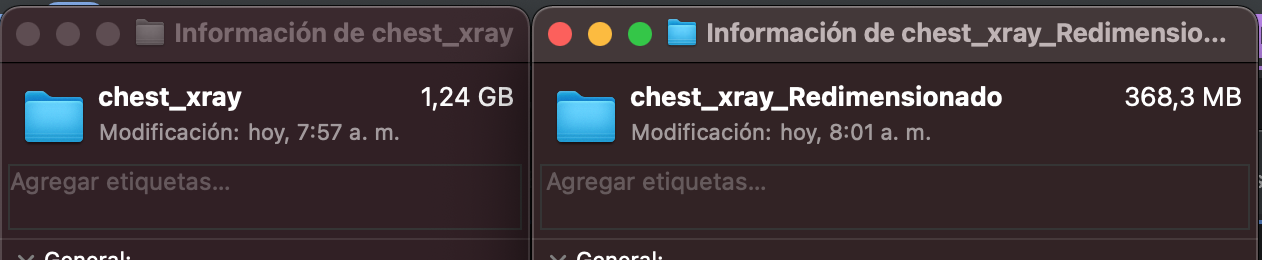



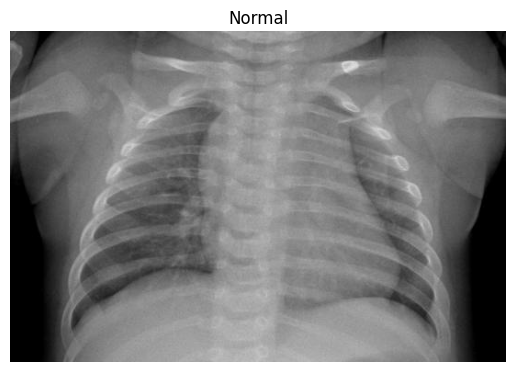

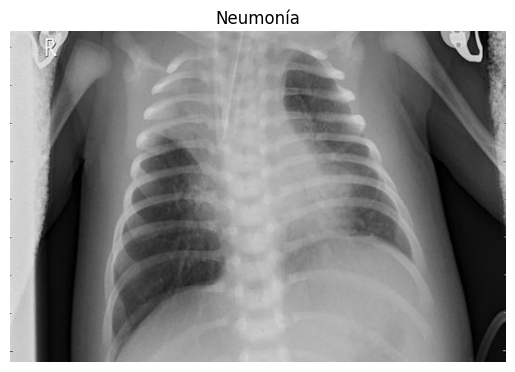

In [10]:
# Rutas de las carpetas de ejemplo
ejemplo_normal_dir = ("Downloads/chest_xray/chest_xray_Redimensionado/test/NORMAL")
ejemplo_pneumonia_dir = ("Downloads/chest_xray/chest_xray_Redimensionado/test/PNEUMONIA")

# Función para mostrar una imagen de ejemplo
def mostrar_imagen_ejemplo(carpeta, etiqueta):
    imagen = os.listdir(carpeta)[2]
    imagen_ruta = os.path.join(carpeta, imagen)

    plt.imshow(load_img(imagen_ruta))
    plt.title(etiqueta)
    plt.axis('off')
    plt.show()

mostrar_imagen_ejemplo(ejemplo_normal_dir, etiqueta="Normal")
mostrar_imagen_ejemplo(ejemplo_pneumonia_dir, etiqueta="Neumonía")

In [11]:
# Define el path al nuevo dataset Redimensionado
dataset_dir = 'Downloads/chest_xray/chest_xray_Redimensionado/'

In [12]:
# Define las dimensiones de las imagenes
img_width, img_height = 540, 360  #Aqui se ajusta el tamaño en px
batch_size = 32

In [13]:
# Crea data generators para train, validation, test
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'val'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
# Genera el modelo de REDES NEURONALES CONVOLUCIONALES
model = Sequential()

# Capa convolucional 1

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Capa completamente conectada

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [15]:
# Crea el optimizer con un learning rate personalizado
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilar el modelo con el cusom optimizar
model.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

In [16]:
# Define callbacks
checkpoint = ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)


In [17]:
# Evaluar modelo en el conjunto de pruebas (test)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

20/20 [==============================] - 35s 2s/step - loss: 0.6994 - accuracy: 0.3798
Test accuracy: 0.3798076808452606


In [18]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [19]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  
    callbacks=[checkpoint, early_stopping] )

Epoch 1/10
163/163 [==============================] - 1131s 7s/step - loss: 0.4807 - accuracy: 0.8008
Epoch 2/10
163/163 [==============================] - 1085s 7s/step - loss: 0.3410 - accuracy: 0.8395
Epoch 3/10
163/163 [==============================] - 5311s 33s/step - loss: 0.3404 - accuracy: 0.8342
Epoch 4/10
163/163 [==============================] - 1081s 7s/step - loss: 0.3278 - accuracy: 0.8449
Epoch 5/10
163/163 [==============================] - 1090s 7s/step - loss: 0.3111 - accuracy: 0.8572
Epoch 6/10
163/163 [==============================] - 1081s 7s/step - loss: 0.2787 - accuracy: 0.8827
Epoch 7/10
163/163 [==============================] - 1083s 7s/step - loss: 0.2598 - accuracy: 0.8852
Epoch 8/10
163/163 [==============================] - 1076s 7s/step - loss: 0.2653 - accuracy: 0.8815
Epoch 9/10
163/163 [==============================] - 1072s 7s/step - loss: 0.2408 - accuracy: 0.9032
Epoch 10/10
163/163 [==============================] - 1065s 7s/step - loss: 0.24

In [21]:
# Guardar el modelo para su uso posterior.
model.save('pneumonia_model.h5')
model.save('pneumonia_model.keras')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 538, 358, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 269, 179, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 267, 177, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 133, 88, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 131, 86, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 65, 43, 128)       0

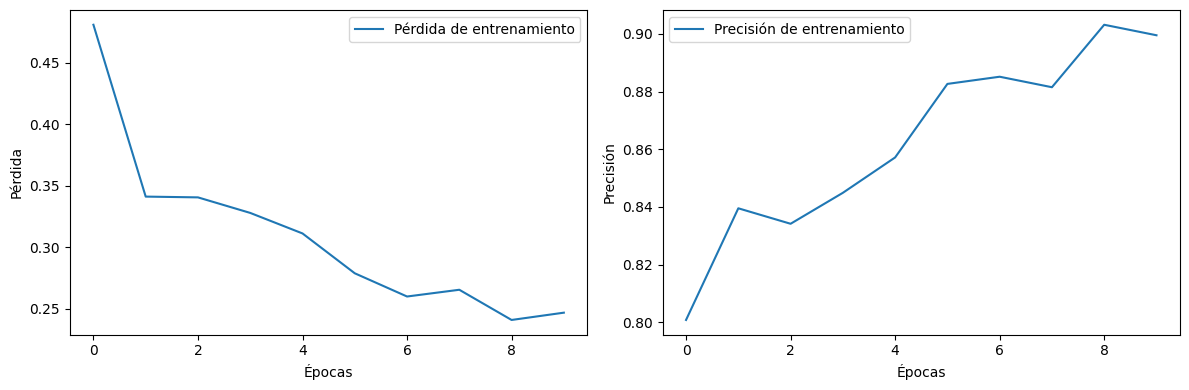

In [25]:
plt.figure(figsize=(12, 4))
# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Graficar la curva de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [31]:
# Cargar el modelo entrenado
model = load_model("pneumonia_model.keras")  # Ruta al archivo del modelo

In [32]:
# Carpetas para probar
test_normal_dir = ("Downloads/chest_xray/chest_xray_Redimensionado/test/NORMAL")
test_pneumonia_dir = ("Downloads/chest_xray/chest_xray_Redimensionado/test/PNEUMONIA")


In [33]:
# Cargar una imagen y convertirla en un arreglo
def cargar_procesar(image_path):
    img = load_img(image_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [39]:
# Clases del modelo (normal y neumonía)
class_names = ['NORMAL', 'PNEUMONIA']

In [53]:
# Verificar algunas imágenes clasificadas por el modelo
sample_images = [os.path.join(test_normal_dir, img) for img in os.listdir(test_normal_dir)[:9]] + \
                [os.path.join(test_pneumonia_dir, img) for img in os.listdir(test_pneumonia_dir)[:9]]

1/1 [==============================] - 0s 95ms/step


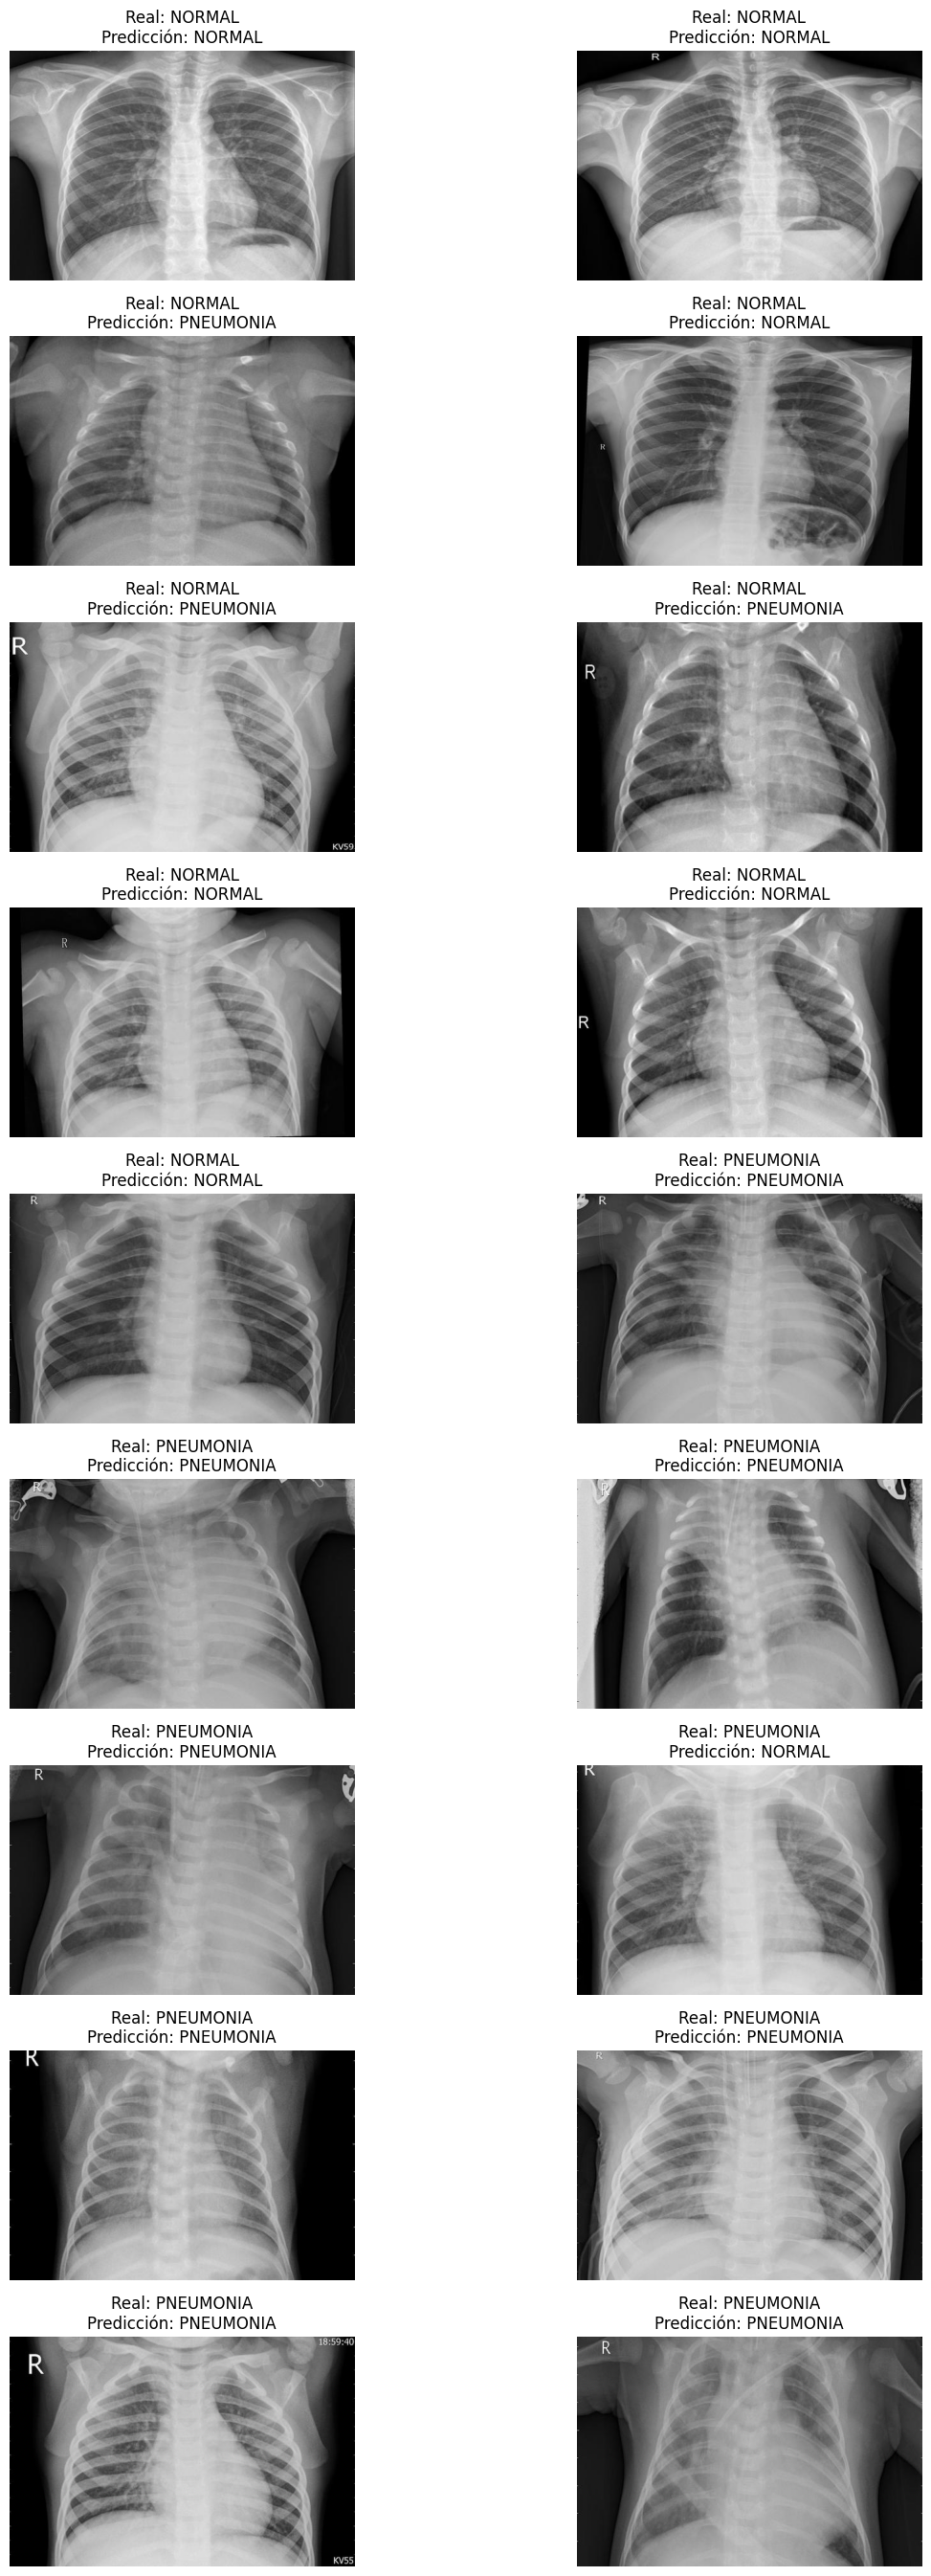

In [59]:
plt.figure(figsize=(12, 30))

for i, image_path in enumerate(sample_images, 1):
    image = cargar_procesar(image_path)
    prediction = model.predict(image)
    predicted_class = class_names[int(prediction[0][0] > 0.5)]  # Umbral de clasificación

    plt.subplot(10, 2, i)
    plt.imshow(load_img(image_path))
    plt.title(f"Real: {os.path.basename(os.path.dirname(image_path))}\nPredicción: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

20/20 [==============================] - 39s 2s/step


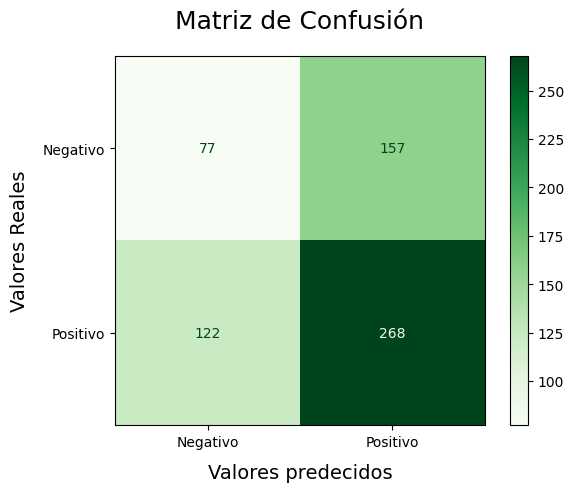

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# conjunto de prueba para predicciones
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).flatten()
y_true = test_generator.classes # etiquetas

confusion = confusion_matrix(y_true, y_pred)

# Crear el heatmap de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=['Negativo', 'Positivo'])
disp.plot(cmap='Greens', values_format='d')

plt.xlabel("Valores predecidos", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Valores Reales", fontdict={'size': 14}, labelpad=10)
plt.title("Matriz de Confusión", fontdict={'size': 18}, pad=20)
plt.show()


In [66]:
#pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
#pip install tensorflow==2.13.0  

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#TUNNING

In [85]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parámetros de preprocesamiento y aumento de datos
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Generadores de datos para entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Parámetros que deseas ajustar
optimizers = ['adam', 'sgd', 'rmsprop']
dropout_rates = [0.2, 0.3, 0.4]

best_accuracy = 0.0
best_model = None
best_params = {}

# Bucle para buscar los mejores hiperparámetros
for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        # Crear y compilar el modelo
        model3 = Sequential()
        model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
        model3.add(MaxPooling2D((2, 2)))
        model3.add(Conv2D(64, (3, 3), activation='relu'))
        model3.add(MaxPooling2D((2, 2)))
        model3.add(Conv2D(128, (3, 3), activation='relu'))
        model3.add(MaxPooling2D((2, 2)))
        model3.add(Flatten())
        model3.add(Dense(128, activation='relu'))
        model3.add(Dropout(dropout_rate))
        model3.add(Dense(1, activation='sigmoid'))
        model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
        # Entrenar el modelo
        history = model3.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            epochs=2,
            verbose=0
        )
        
        # Evaluar el modelo
        test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='binary'
        )
        y_pred = model.predict(test_generator)
        accuracy = accuracy_score(test_generator.classes, (y_pred > 0.5).astype(int))
        
        print(f"Optimizer: {optimizer}, Dropout Rate: {dropout_rate}, Accuracy: {accuracy}")
        
        # Verificar si es el mejor modelo hasta ahora
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_params = {'optimizer': optimizer, 'dropout_rate': dropout_rate}

print("Mejores hiperparámetros encontrados:", best_params)
print("Exactitud del mejor modelo en el conjunto de prueba:", best_accuracy)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
20/20 [==============================] - 4s 182ms/step
Optimizer: adam, Dropout Rate: 0.2, Accuracy: 0.5192307692307693
Found 624 images belonging to 2 classes.
20/20 [==============================] - 4s 211ms/step
Optimizer: adam, Dropout Rate: 0.3, Accuracy: 0.5160256410256411
Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 224ms/step
Optimizer: adam, Dropout Rate: 0.4, Accuracy: 0.483974358974359
Found 624 images belonging to 2 classes.
20/20 [==============================] - 4s 202ms/step
Optimizer: sgd, Dropout Rate: 0.2, Accuracy: 0.5224358974358975
Found 624 images belonging to 2 classes.
20/20 [==============================] - 4s 201ms/step
Optimizer: sgd, Dropout Rate: 0.3, Accuracy: 0.5416666666666666
Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 229ms/step
Optimizer: sgd, Drop

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 271s 2s/step - loss: 0.6202 - accuracy: 0.7421
Epoch 2/10
163/163 [==============================] - 260s 2s/step - loss: 0.5825 - accuracy: 0.7429
Epoch 3/10
163/163 [==============================] - 264s 2s/step - loss: 0.5776 - accuracy: 0.7429
Epoch 4/10
163/163 [==============================] - 262s 2s/step - loss: 0.5740 - accuracy: 0.7429
Epoch 5/10
163/163 [==============================] - 655s 4s/step - loss: 0.5760 - accuracy: 0.7429
Epoch 6/10
163/163 [==============================] - 262s 2s/step - loss: 0.5734 - accuracy: 0.7429
Epoch 7/10
163/163 [==============================] - 340s 2s/step - loss: 0.5726 - accuracy: 0.7429
Epoch 8/10
163/163 [==============================] - 561s 3s/step - loss: 0.5755 - accuracy: 0.7429
Epoch 9/10
163/163 [==============================] - 271s 2s/step - loss: 0.5759 - accuracy: 0.7429
Epoch 10/

KeyError: 'val_loss'

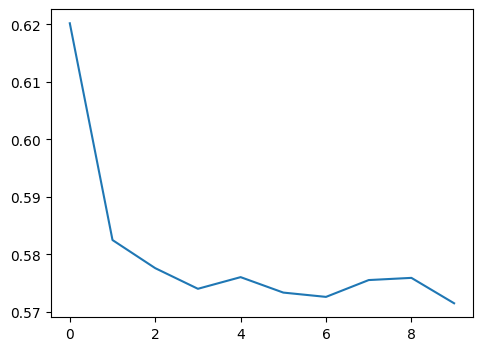

In [90]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

# Directorios de datos
train_dir = 'Downloads/chest_xray/chest_xray_Redimensionado/train/'
validation_dir = 'Downloads/chest_xray/chest_xray_Redimensionado/val/'
test_dir = 'Downloads/chest_xray/chest_xray_Redimensionado/test/'

# Parámetros de preprocesamiento y aumento de datos
img_width, img_height = 270, 180
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Generadores de datos para entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Crear el modelo CNN
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model2.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

# Entrenar el modelo
history = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

# Evaluar el modelo en el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_accuracy = model2.evaluate(test_generator)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Exactitud en el conjunto de prueba:", test_accuracy)

# Graficar la curva de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 184ms/step


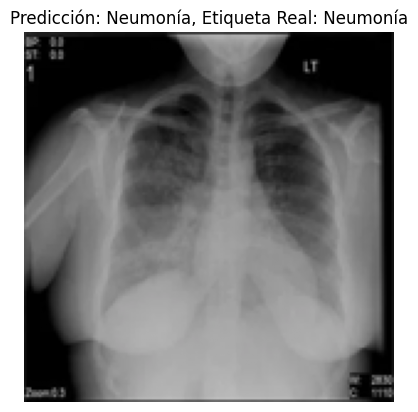

Clase de la imagen: Neumonía


In [105]:
from PIL import Image
import matplotlib.pyplot as plt

def cargar_y_clasificar_imagen(ruta_imagen, modelo, etiqueta_real):
    # Cargar y redimensionar la imagen de entrada
    img = Image.open(ruta_imagen)
    img = img.resize((150, 150))
    img = np.array(img)
    img = img / 255.0  # Escalar los valores de píxeles al rango [0, 1]

    # Asegurarse de que la imagen tenga 3 canales (RGB)
    if img.shape[-1] != 3:
        img = np.stack((img,) * 3, axis=-1)

    img = np.expand_dims(img, axis=0)

    # Realizar la predicción
    resultado = modelo.predict(img)

    # Interpretar el resultado
    if resultado[0] > 0.5:
        clase_prediccion = "Neumonía"
    else:
        clase_prediccion = "Normal"

    # Mostrar la imagen
    plt.imshow(img[0])
    plt.title(f'Predicción: {clase_prediccion}, Etiqueta Real: {etiqueta_real}')
    plt.axis('off')
    plt.show()

    return clase_prediccion

# Ruta de la imagen que deseas clasificar
ruta_imagen = "Downloads/chest_xray/validation/pneumonia 1.webp"  # ruta de tu imagen
etiqueta_real = "Neumonía"  # etiqueta real de la imagen

# Clasificar la imagen utilizando la función
resultado_clasificacion = cargar_y_clasificar_imagen(ruta_imagen, model, etiqueta_real)

print(f"Clase de la imagen: {resultado_clasificacion}")
